In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
from scipy import signal

In [36]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def graficar_canales(señal1, señal2, señal3, señal4):
    fig = plt.figure(figsize=(17,20))
    fig.tight_layout()

    
    color =['','red','green','blue','yellow']

    for i in range(1,4):
        ax = plt.subplot(4,3,i)
        ax.plot(señal1[i-1],color=color[2])
        plt.title("Estimulo de la Derecha 6.6 Hz")
        plt.ylabel(" Amplitud (mV)")
        plt.xlabel("Muestras")
        plt.ylim(-15,15)

        ax = plt.subplot(4,3,i+3)
        ax.plot(señal2[i-1],color=color[3])
        plt.title("Estimulo de abajo 7.5 Hz")
        plt.ylabel(" Amplitud (mV)")
        plt.xlabel("Muestras")
        plt.ylim(-15,15)

        ax = plt.subplot(4,3,i+6)
        ax.plot(señal3[i-1],color=color[4])
        plt.title("Estimulo de la izquierda 8.5 Hz")
        plt.ylabel(" Amplitud (mV)")
        plt.xlabel("Muestras")
        plt.ylim(-15,15)

        ax = plt.subplot(4,3,i+9)
        ax.plot(señal4[i-1],color=color[1])
        plt.title("Estimulo de Arriba 10 Hz")
        plt.ylabel(" Amplitud (mV)")
        plt.xlabel("Muestras")
        plt.ylim(-15,15)

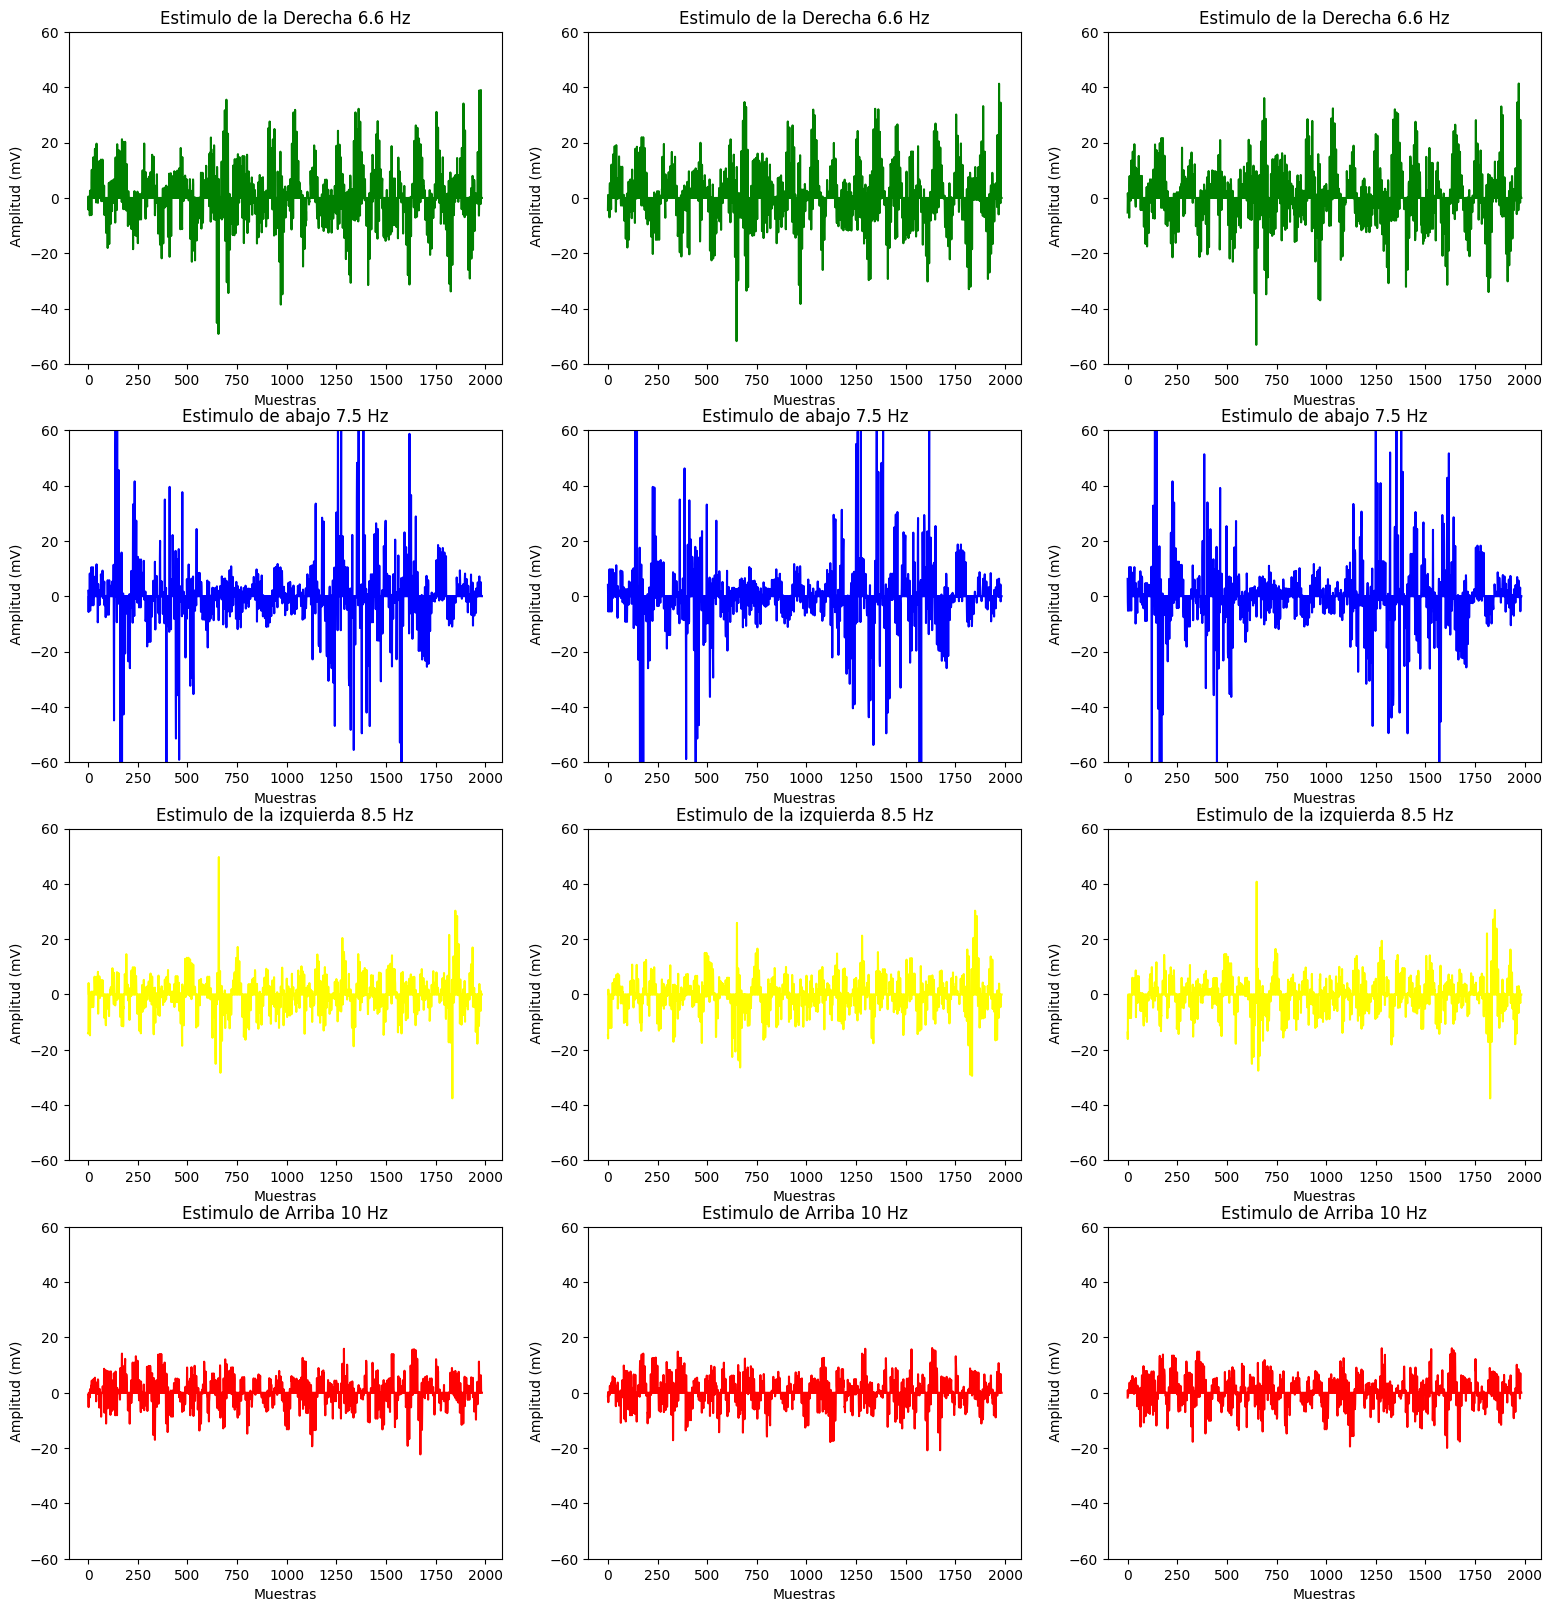

In [31]:

up = pd.read_csv("../PRUEBAS/3 canales/LAU/3/arriba",sep=';')
down = pd.read_csv("../PRUEBAS/3 canales/LAU/3/abajo",sep=';')
left = pd.read_csv("../PRUEBAS/3 canales/LAU/3/izquierda",sep=';')
rigth = pd.read_csv("../PRUEBAS/3 canales/LAU/3/derecha",sep=';')

color =['','red','green','blue','yellow']
fig = plt.figure(figsize=(19,25))
fig.tight_layout()
for i in range(1,4):

    ax = plt.subplot(5,3,i)
    ax.plot(rigth[f'{i-1}'],color=color[2])
    plt.title("Estimulo de la Derecha 6.6 Hz")
    plt.ylabel(" Amplitud (mV)")
    plt.xlabel("Muestras")
    plt.ylim(-60,60)

    ax = plt.subplot(5,3,i+3)
    ax.plot(down[f'{i-1}'],color=color[3])
    plt.title("Estimulo de abajo 7.5 Hz")
    plt.ylabel(" Amplitud (mV)")
    plt.xlabel("Muestras")
    plt.ylim(-60,60)

    ax = plt.subplot(5,3,i+6)
    ax.plot(left[f'{i-1}'],color=color[4])
    plt.title("Estimulo de la izquierda 8.5 Hz")
    plt.ylabel(" Amplitud (mV)")
    plt.xlabel("Muestras")
    plt.ylim(-60,60)

    ax = plt.subplot(5,3,i+9)
    ax.plot(up[f'{i-1}'],color=color[1])
    plt.title("Estimulo de Arriba 10 Hz")
    plt.ylabel(" Amplitud (mV)")
    plt.xlabel("Muestras")
    plt.ylim(-60,60)
    #plt.xlim(0,2000)

In [37]:
arribaF = []
derechaF = []
abajoF = []
izquierdaF = []

fs = 250
lowcut = 5
highcut = 20

cannal_0_fA=butter_bandpass_filter(rigth['0'] , lowcut, highcut, fs,order=6)
cannal_1_fA=butter_bandpass_filter(rigth['1'] , lowcut, highcut, fs,order=6)
cannal_2_fA=butter_bandpass_filter(rigth['2'] , lowcut, highcut, fs,order=6)

cannal_0_fD=butter_bandpass_filter(down['0'] , lowcut, highcut, fs,order=6)
cannal_1_fD=butter_bandpass_filter(down['1'] , lowcut, highcut, fs,order=6)
cannal_2_fD=butter_bandpass_filter(down['2'] , lowcut, highcut, fs,order=6)

cannal_0_fB=butter_bandpass_filter(left['0'] , lowcut, highcut, fs,order=6)
cannal_1_fB=butter_bandpass_filter(left['1'] , lowcut, highcut, fs,order=6)
cannal_2_fB=butter_bandpass_filter(left['2'] , lowcut, highcut, fs,order=6)

cannal_0_fI=butter_bandpass_filter(up['0'] , lowcut, highcut, fs,order=6)
cannal_1_fI=butter_bandpass_filter(up['1'] , lowcut, highcut, fs,order=6)
cannal_2_fI=butter_bandpass_filter(up['2'] , lowcut, highcut, fs,order=6)

arribaF = np.vstack((cannal_0_fA, cannal_1_fA,cannal_2_fA))
derechaF = np.vstack((cannal_0_fD, cannal_1_fD,cannal_2_fD))
abajoF = np.vstack((cannal_0_fB, cannal_1_fB,cannal_2_fB))
izquierdaF = np.vstack((cannal_0_fI, cannal_1_fI,cannal_2_fI))

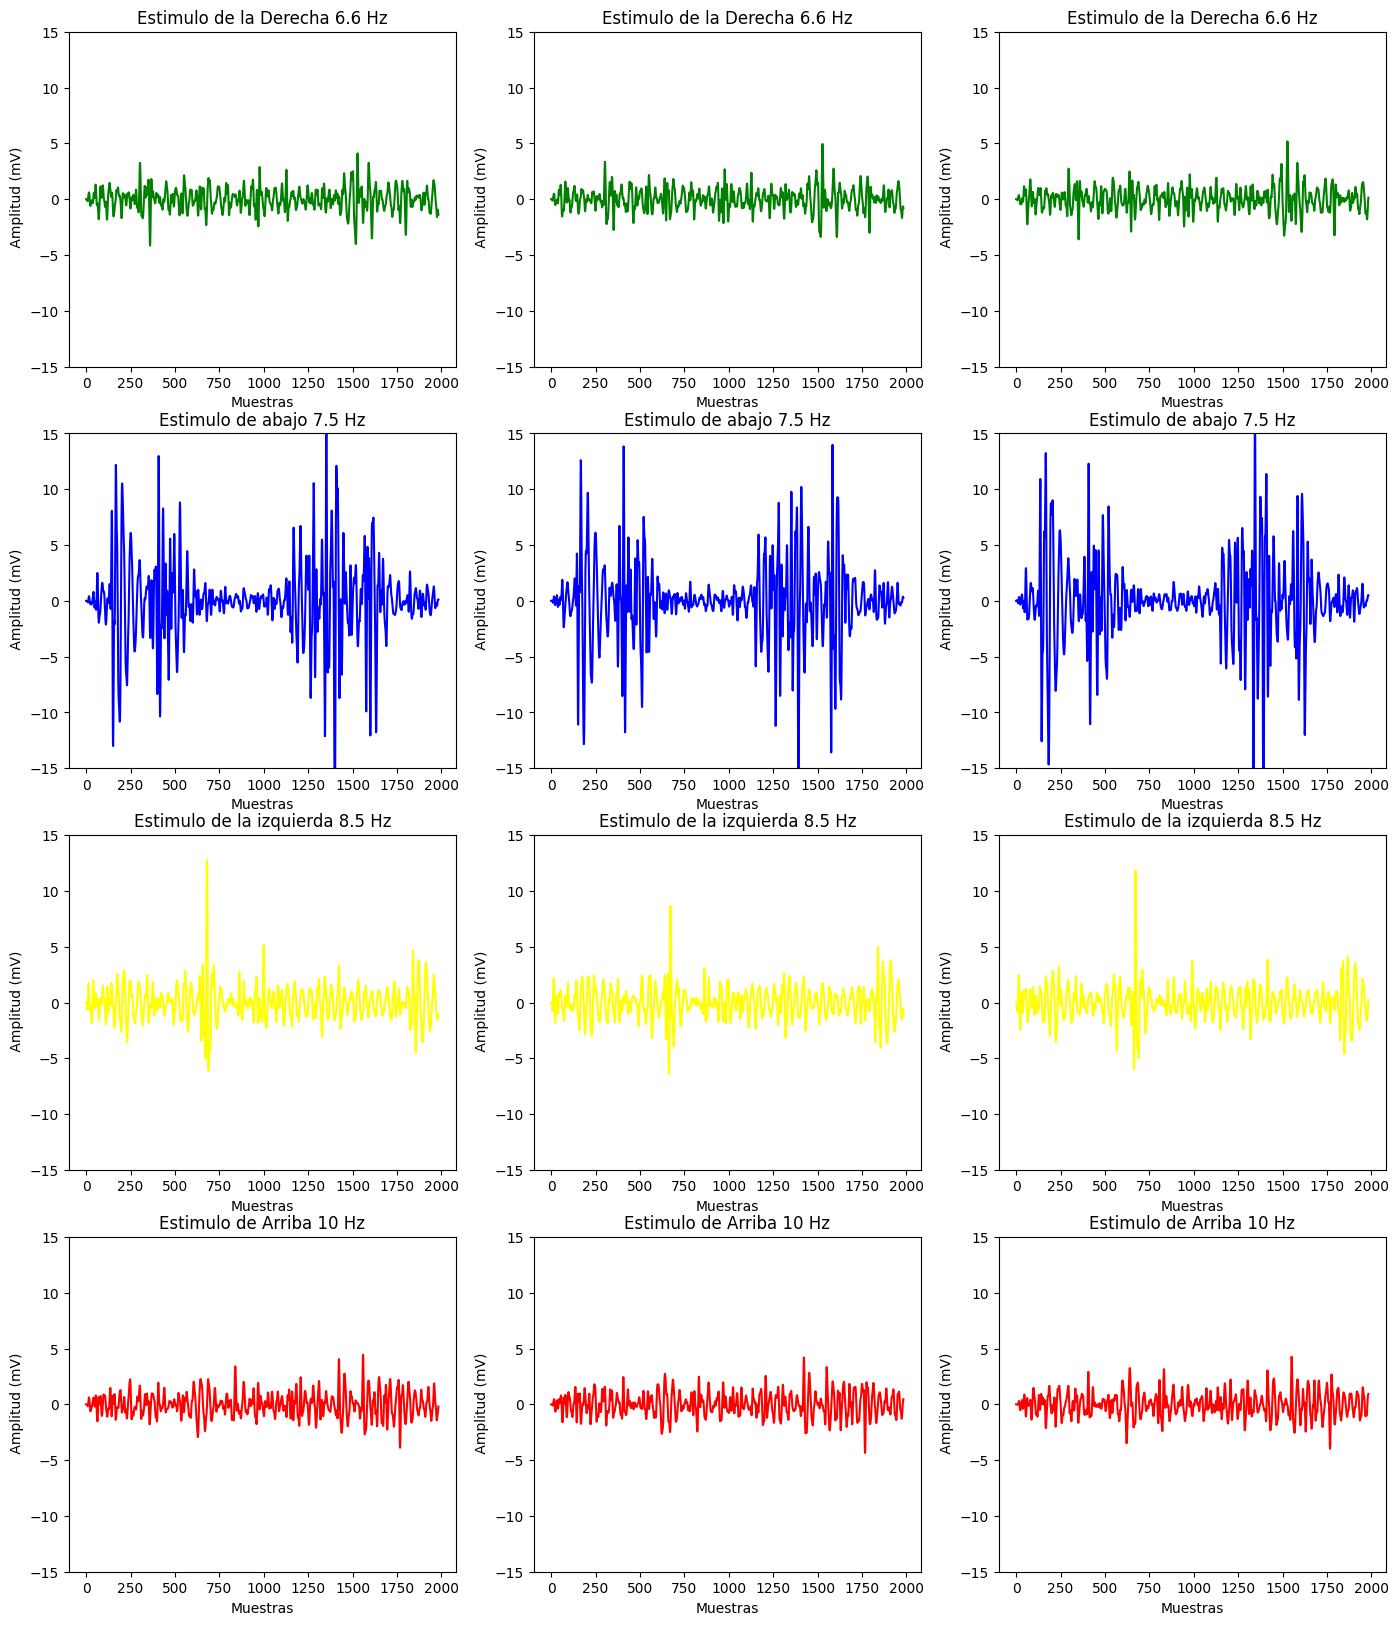

In [38]:
graficar_canales(señal1=arribaF,señal2=derechaF,señal3=abajoF, señal4= izquierdaF)

In [150]:
# Configuración de la transformada de Fourier
n = len(abajoF[1])
frecuencias = fftfreq(n)

# Calcular la transformada de Fourier
transformada = fft(izquierdaF[1])

# Obtener el valor absoluto de la transformada
transformada_abs = np.abs(transformada)

# Encontrar el índice de la frecuencia máxima
indice_max = np.argmax(transformada_abs)

# Obtener la frecuencia correspondiente al índice máximo
frecuencia_max = frecuencias[indice_max]

# Calcular el ancho de banda
ancho_banda = 2 * np.abs(frecuencia_max)

print("El ancho de banda de la señal encefalográfica es:", ancho_banda)

El ancho de banda de la señal encefalográfica es: 0.24596774193548387


In [151]:
cruces_por_cero = np.where(np.diff(np.signbit(izquierdaF[0])))[0]
contador_cruces = len(cruces_por_cero)
print("La señal cruza por cero", contador_cruces, "veces.")

print("Los cruces por cero de la señal encefalográfica ocurren en los índices:", cruces_por_cero)


La señal cruza por cero 324 veces.
Los cruces por cero de la señal encefalográfica ocurren en los índices: [   3    8   16   20   24   30   32   37   40   45   64   69   72   77
   80   83   88   92   96  102  104  107  112  116  120  126  128  132
  137  140  145  146  153  157  160  165  168  176  185  188  194  195
  201  209  218  224  232  241  248  265  269  272  284  289  293  297
  303  307  308  315  318  329  336  344  349  352  358  360  368  377
  384  390  392  408  423  424  430  433  436  441  445  450  452  458
  459  466  468  473  478  489  494  496  501  505  510  513  520  529
  534  537  540  544  554  561  568  578  581  586  592  597  599  609
  625  631  649  651  657  662  665  668  673  680  689  695  705  712
  722  724  729  736  739  744  750  752  757  760  768  777  780  785
  792  800  809  824  841  843  848  863  873  880  889  894  896  905
  914  920  925  928  935  936  942  945  949  969  976  983  986  992
 1001 1008 1020 1025 1037 1041 1048 1057 

In [105]:
rms = np.sqrt(np.mean(abajoF[0]**2))

print("El valor RMS de la señal encefalográfica es:", rms)

El valor RMS de la señal encefalográfica es: 4.885502504607805


In [98]:
from scipy.stats import skew
skewness = skew(arribaF[0])

print("La skewness de la señal encefalográfica es:", skewness)

La skewness de la señal encefalográfica es: 0.03682327668004213


In [93]:
import numpy as np
from scipy import stats
# Calcular la curtosis de la señal
curtosis = stats.kurtosis(arribaF[0])

print("Curtosis de la señal:", curtosis)

Curtosis de la señal: 0.24941624626942582


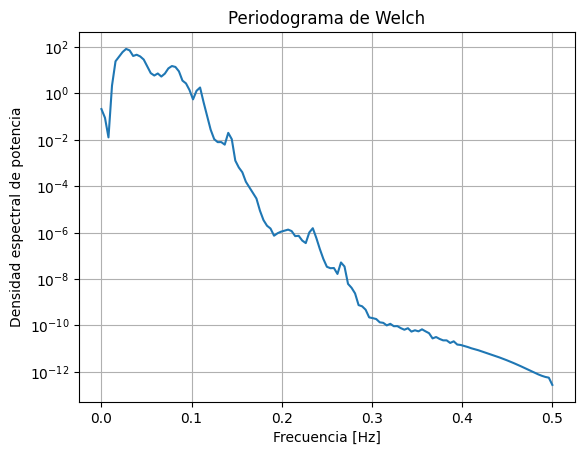

4.156765013692726


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Ejemplo de señal encefalográfica
senal_encefalo = izquierdaF[0]
# Configuración del periodograma de Welch
frecuencias, periodograma = welch(senal_encefalo)

# Graficar el periodograma de Welch
plt.figure()
plt.semilogy(frecuencias, periodograma)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch')
plt.grid(True)
plt.show()

media_periodograma = np.mean(periodograma)
print(media_periodograma)

In [38]:
fs = 250
f, Pxx = signal.periodogram(rep['1'], fs)

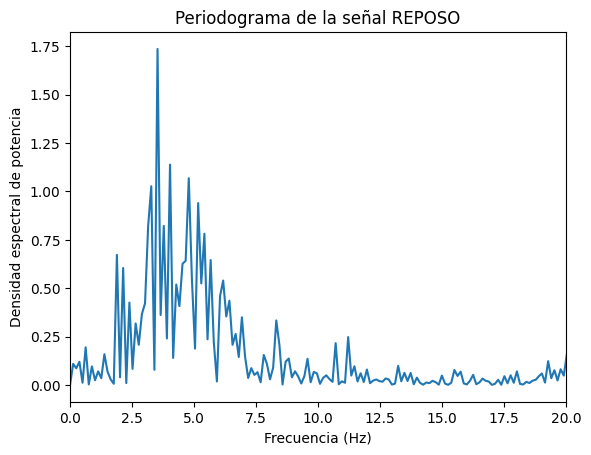

In [40]:
plt.figure()
plt.plot(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de la señal REPOSO')
plt.xlim(0,20)
plt.show()

In [41]:
np.mean(Pxx)

0.09718043964536667

In [85]:
envelope = np.abs(signal.hilbert(Pxx1))

In [86]:
np.mean(envelope)

0.0022789122463076055

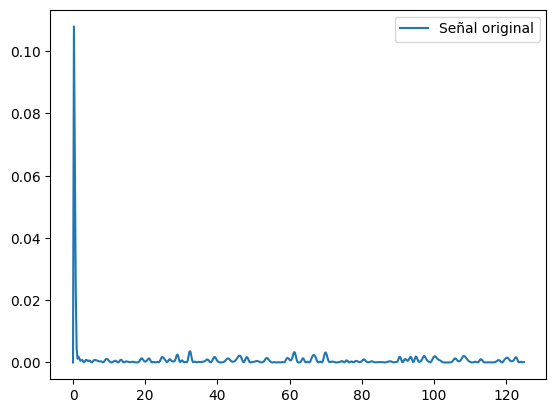

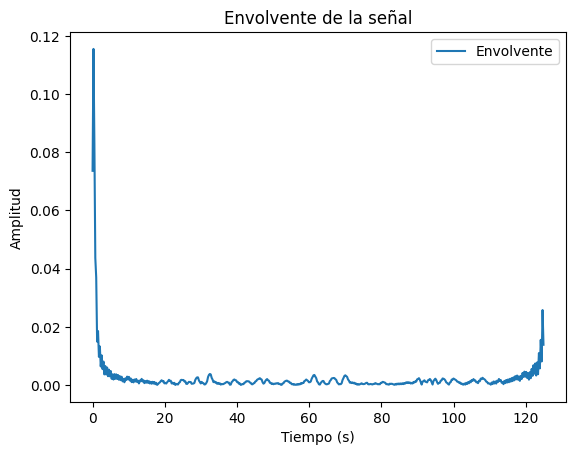

In [88]:
# Graficar la señal original y su envolvente
plt.figure()
plt.plot(f,Pxx1 , label='Señal original')
plt.legend()
plt.figure()
plt.plot(f, envelope, label='Envolvente')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Envolvente de la señal')
plt.legend()
plt.show()

In [25]:
# Filtro 1

arribaF1 = []
derechaF1 = []
abajoF1 = []
izquierdaF1 = []

fs = 250
lowcut = 5.6
highcut = 7.6
cannal_0_fA1=butter_bandpass_filter(arribaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fA1=butter_bandpass_filter(arribaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fA1=butter_bandpass_filter(arribaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fD1=butter_bandpass_filter(derechaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fD1=butter_bandpass_filter(derechaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fD1=butter_bandpass_filter(derechaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fB1=butter_bandpass_filter(abajoF[0] , lowcut, highcut, fs,order=6)
cannal_1_fB1=butter_bandpass_filter(abajoF[1] , lowcut, highcut, fs,order=6)
cannal_2_fB1=butter_bandpass_filter(abajoF[2] , lowcut, highcut, fs,order=6)

cannal_0_fI1=butter_bandpass_filter(izquierdaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fI1=butter_bandpass_filter(izquierdaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fI1=butter_bandpass_filter(izquierdaF[2] , lowcut, highcut, fs,order=6)

arribaF1 = np.vstack((cannal_0_fA1, cannal_1_fA1,cannal_2_fA1))
derechaF1 = np.vstack((cannal_0_fD1, cannal_1_fD1,cannal_2_fD1))
abajoF1 = np.vstack((cannal_0_fB1, cannal_1_fB1,cannal_2_fB1))
izquierdaF1 = np.vstack((cannal_0_fI1, cannal_1_fI1,cannal_2_fI1))

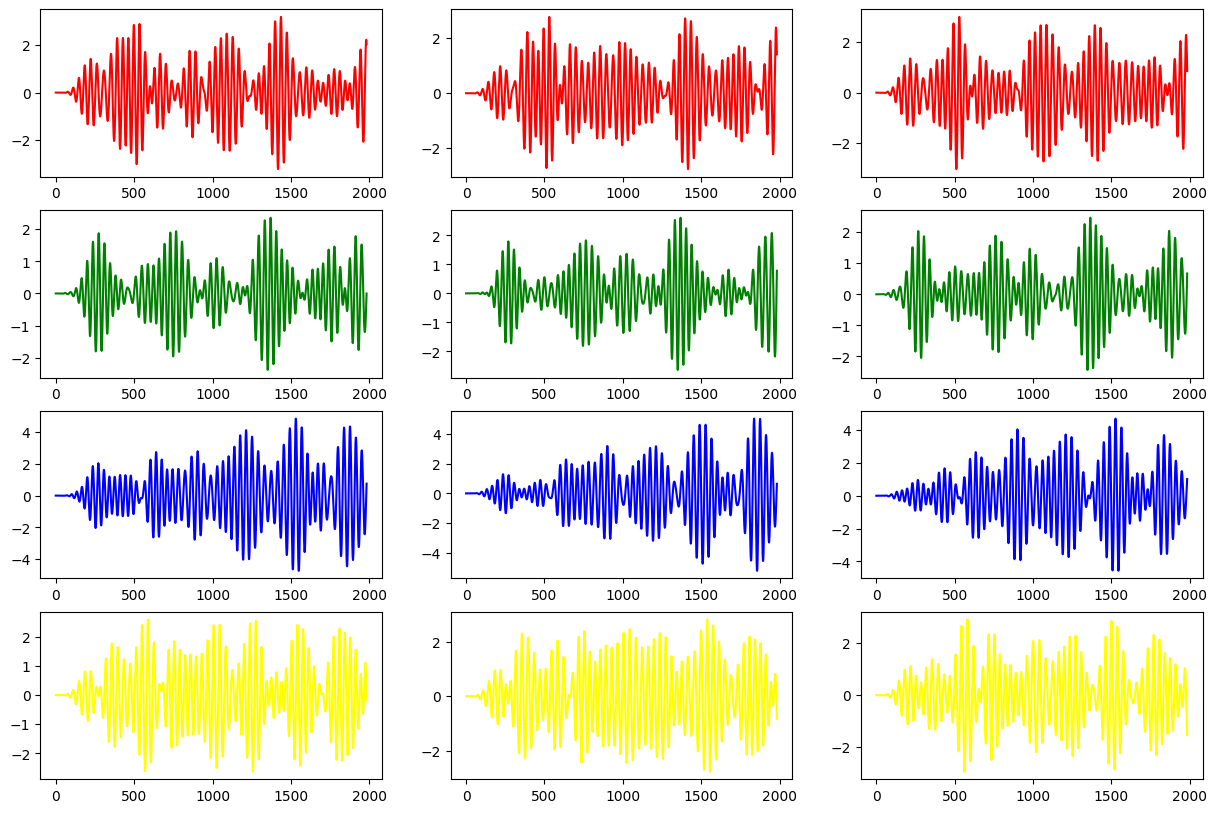

In [26]:
graficar_canales(señal1=arribaF1,señal2=derechaF1,señal3=abajoF1, señal4= izquierdaF1)

In [72]:
fs = 250
f, Pxx = signal.periodogram(arribaF1[1], fs)

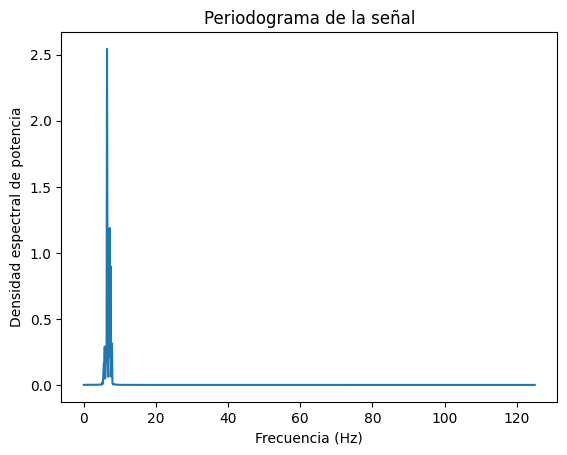

In [73]:
plt.figure()
plt.plot(f, Pxx)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de la señal')
plt.show()

In [74]:
np.mean(Pxx)

0.008632646606073028

In [53]:
arribaF1f = []
derechaF1f = []
abajoF1f = []
izquierdaF1f = []

cannal_0_fA1f = fft(arribaF[0])
cannal_1_fA1f = fft(arribaF[1])
cannal_2_fA1f = fft(arribaF[2])

cannal_0_fD1f = fft(derechaF[0])
cannal_1_fD1f = fft(derechaF[1])
cannal_2_fD1f = fft(derechaF[2])

cannal_0_fB1f = fft(abajoF[0])
cannal_1_fB1f = fft(abajoF[1])
cannal_2_fB1f = fft(abajoF[2])

cannal_0_fI1f = fft(izquierdaF[0])
cannal_1_fI1f = fft(izquierdaF[1])
cannal_2_fI1f = fft(izquierdaF[2])

arribaF1f = np.vstack((cannal_0_fA1f, cannal_1_fA1f,cannal_2_fA1f))
derechaF1f = np.vstack((cannal_0_fD1f, cannal_1_fD1f,cannal_2_fD1f))
abajoF1f = np.vstack((cannal_0_fB1f, cannal_1_fB1f,cannal_2_fB1f))
izquierdaF1f = np.vstack((cannal_0_fI1f, cannal_1_fI1f,cannal_2_fI1f))

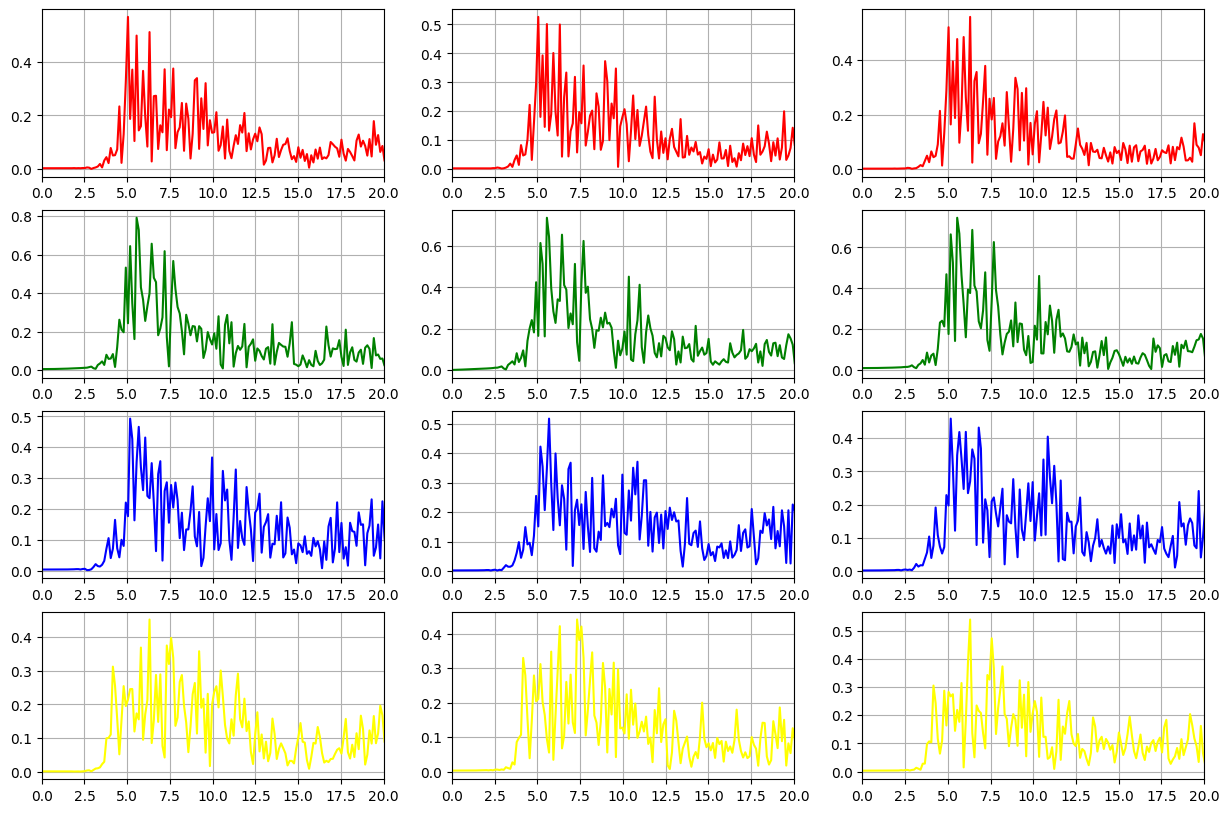

In [54]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA1f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF1f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF1f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF1f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF1f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

In [19]:
arribaF2 = []
derechaF2 = []
abajoF2 = []
izquierdaF2 = []

fs = 250
lowcut = 6.5
highcut = 8.5
cannal_0_fA2=butter_bandpass_filter(arribaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fA2=butter_bandpass_filter(arribaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fA2=butter_bandpass_filter(arribaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fD2=butter_bandpass_filter(derechaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fD2=butter_bandpass_filter(derechaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fD2=butter_bandpass_filter(derechaF[2] , lowcut, highcut, fs,order=6)

cannal_0_fB2=butter_bandpass_filter(abajoF[0] , lowcut, highcut, fs,order=6)
cannal_1_fB2=butter_bandpass_filter(abajoF[1] , lowcut, highcut, fs,order=6)
cannal_2_fB2=butter_bandpass_filter(abajoF[2] , lowcut, highcut, fs,order=6)

cannal_0_fI2=butter_bandpass_filter(izquierdaF[0] , lowcut, highcut, fs,order=6)
cannal_1_fI2=butter_bandpass_filter(izquierdaF[1] , lowcut, highcut, fs,order=6)
cannal_2_fI2=butter_bandpass_filter(izquierdaF[2] , lowcut, highcut, fs,order=6)

arribaF2 = np.vstack((cannal_0_fA2, cannal_1_fA2,cannal_2_fA2))
derechaF2 = np.vstack((cannal_0_fD2, cannal_1_fD2,cannal_2_fD2))
abajoF2 = np.vstack((cannal_0_fB2, cannal_1_fB2,cannal_2_fB2))
izquierdaF2 = np.vstack((cannal_0_fI2, cannal_1_fI2,cannal_2_fI2))

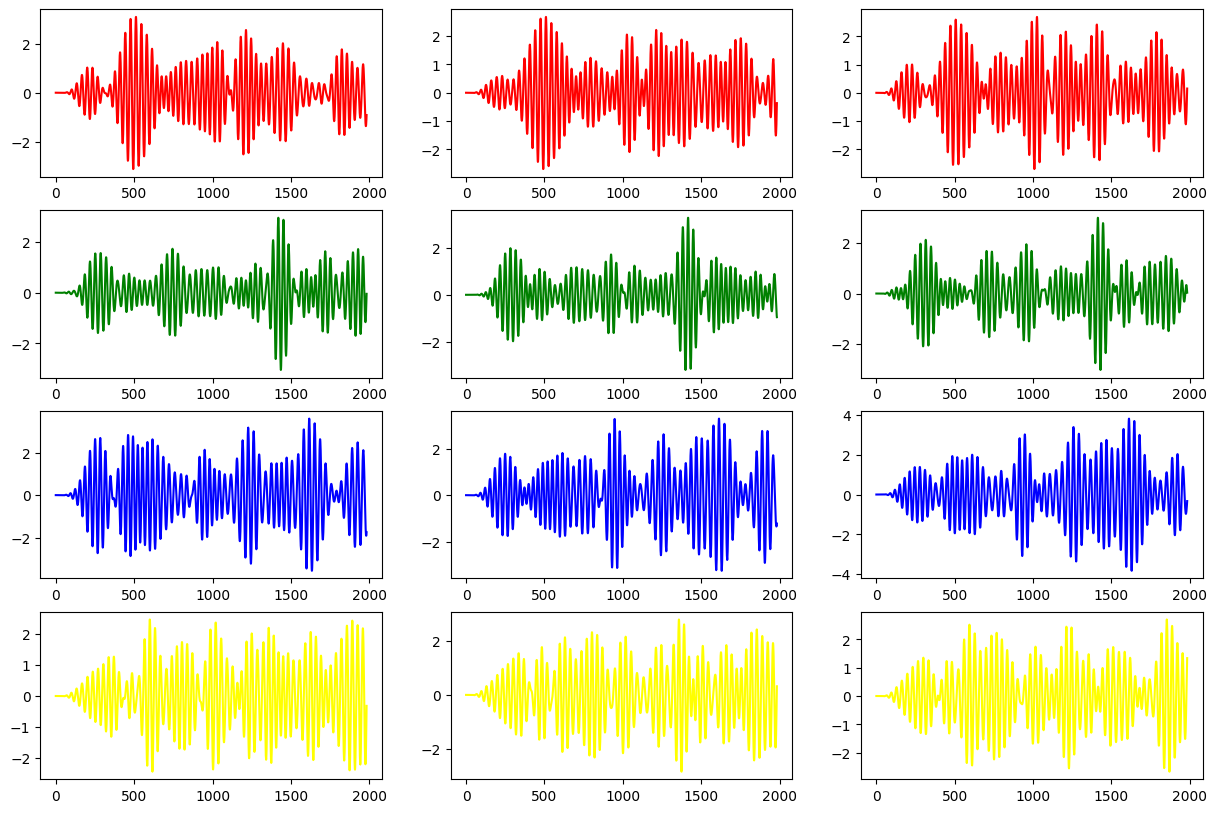

In [14]:
graficar_canales(señal1=arribaF2,señal2=derechaF2,señal3=abajoF2, señal4= izquierdaF2)

In [15]:
arribaF2f = []
derechaF2f = []
abajoF2f = []
izquierdaF2f = []

cannal_0_fA2f = fft(arribaF2[0])
cannal_1_fA2f = fft(arribaF2[1])
cannal_2_fA2f = fft(arribaF2[2])

cannal_0_fD2f = fft(derechaF2[0])
cannal_1_fD2f = fft(derechaF2[1])
cannal_2_fD2f = fft(derechaF2[2])

cannal_0_fB2f = fft(abajoF2[0])
cannal_1_fB2f = fft(abajoF2[1])
cannal_2_fB2f = fft(abajoF2[2])

cannal_0_fI2f = fft(izquierdaF2[0])
cannal_1_fI2f = fft(izquierdaF2[1])
cannal_2_fI2f = fft(izquierdaF2[2])

arribaF2f = np.vstack((cannal_0_fA2f, cannal_1_fA2f,cannal_2_fA2f))
derechaF2f = np.vstack((cannal_0_fD2f, cannal_1_fD2f,cannal_2_fD2f))
abajoF2f = np.vstack((cannal_0_fB2f, cannal_1_fB2f,cannal_2_fB2f))
izquierdaF2f = np.vstack((cannal_0_fI2f, cannal_1_fI2f,cannal_2_fI2f))

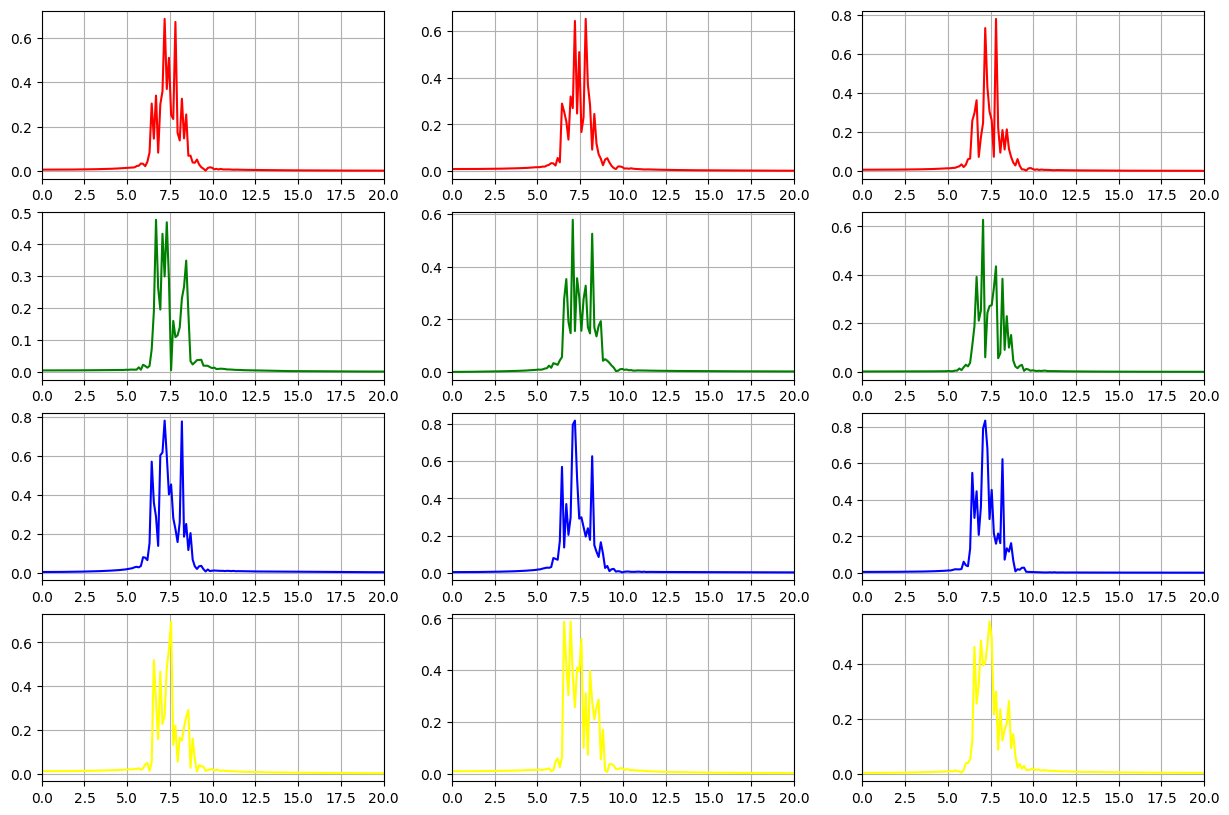

In [16]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA2f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF2f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF2f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF2f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF2f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

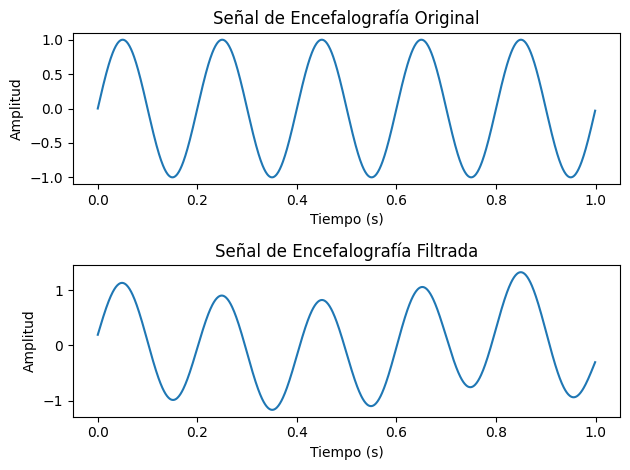

In [33]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Definir los parámetros del filtro
frecuencia_corte = 1  # Frecuencia de corte en Hz
orden = 4  # Orden del filtro

# Crear la señal de encefalografía (por ejemplo)
tiempo_total = 1  # Duración total de la señal en segundos
muestras_por_segundo = 1000  # Número de muestras por segundo
t = np.linspace(0, tiempo_total, int(tiempo_total * muestras_por_segundo), endpoint=False)
senal = np.sin(2 * np.pi * 5 * t)  # Señal de encefalografía de ejemplo (oscila a 5 Hz)

# Calcular los coeficientes del filtro pasa-altas Butterworth
frecuencia_normalizada = frecuencia_corte / (muestras_por_segundo / 2)
b, a = butter(orden, frecuencia_normalizada, btype='high', analog=False, output='ba')

# Aplicar el filtro a la señal de encefalografía
senal_filtrada = filtfilt(b, a, senal)

# Graficar la señal original y la señal filtrada
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title('Señal de Encefalografía Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t, senal_filtrada)
plt.title('Señal de Encefalografía Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


In [31]:
arribaF1f = []
derechaF1f = []
abajoF1f = []
izquierdaF1f = []

cannal_0_fA1f = fft(rigth['0'])
cannal_1_fA1f = fft(rigth['1'])
cannal_2_fA1f = fft(rigth['2'])

cannal_0_fD1f = fft(down['0'])
cannal_1_fD1f = fft(down['1'])
cannal_2_fD1f = fft(down['2'])

cannal_0_fB1f = fft(left['0'])
cannal_1_fB1f = fft(left['1'])
cannal_2_fB1f = fft(left['2'])

cannal_0_fI1f = fft(up['0'])
cannal_1_fI1f = fft(up['1'])
cannal_2_fI1f = fft(up['2'])

derechaF1f = np.vstack((cannal_0_fA1f, cannal_1_fA1f,cannal_2_fA1f))
abajoF1f = np.vstack((cannal_0_fD1f, cannal_1_fD1f,cannal_2_fD1f))
izquierdaF1f = np.vstack((cannal_0_fB1f, cannal_1_fB1f,cannal_2_fB1f))
arribaF1f = np.vstack((cannal_0_fI1f, cannal_1_fI1f,cannal_2_fI1f))

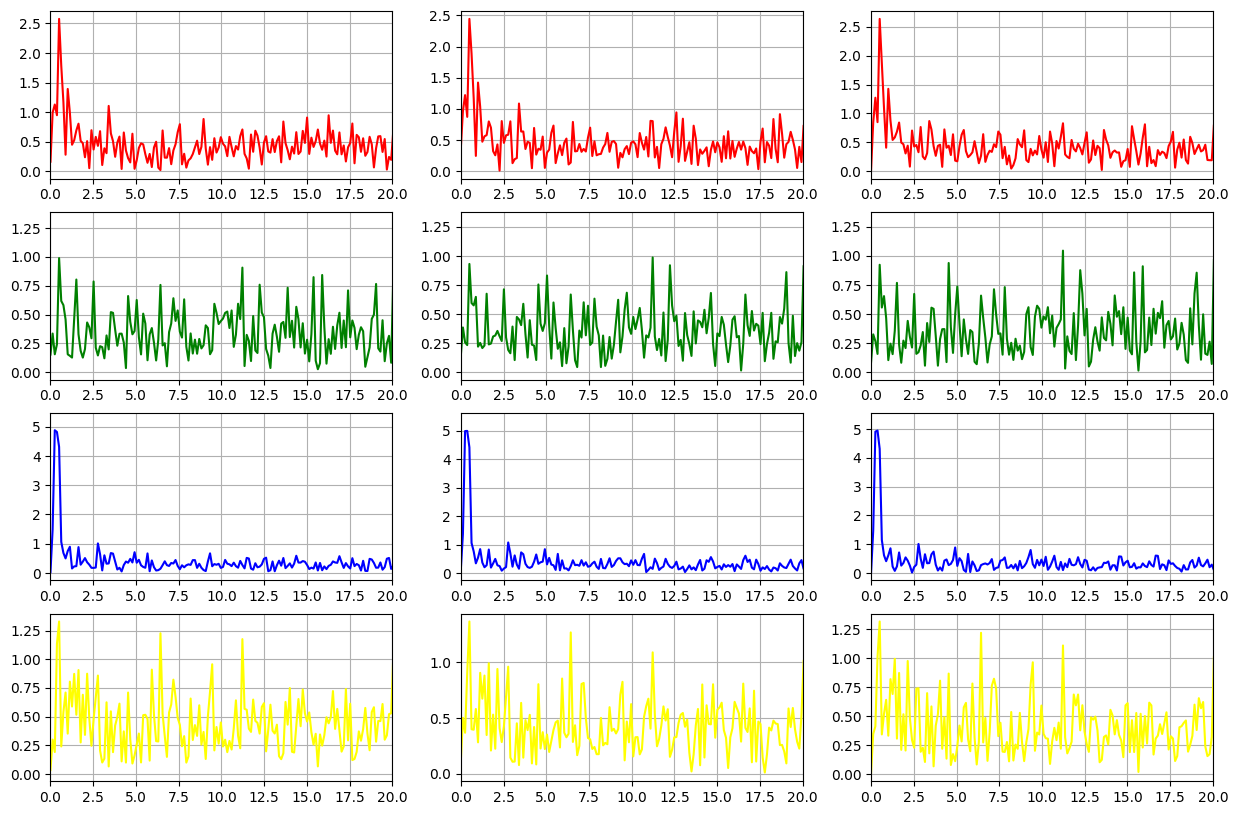

In [32]:
fig = plt.figure(figsize=(15,10))
fig.tight_layout()

T = 1 / 250
L=len(cannal_0_fA1f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)


color =['','red','green','blue','yellow']

for i in range(1,4):
    ax = plt.subplot(4,3,i)
    ax.plot(xf1, 2.0/L * np.abs(arribaF1f[i-1][0:L//2]), color=color[1]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+3)
    ax.plot(xf1, 2.0/L * np.abs(derechaF1f[i-1][0:L//2]), color=color[2]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+6)
    ax.plot(xf1, 2.0/L * np.abs(abajoF1f[i-1][0:L//2]), color=color[3]),plt.grid()
    ax.set_xlim([0,20])

    ax = plt.subplot(4,3,i+9)
    ax.plot(xf1, 2.0/L * np.abs(izquierdaF1f[i-1][0:L//2]), color=color[4]),plt.grid()
    ax.set_xlim([0,20])

In [20]:


frecuencia = 250  # Frecuencia de la señal en Hz
tiempo_total = 100  # Duración total de la señal en segundos
muestras_por_segundo = tiempo_total * 25  # Número de muestras por segundo

t = np.linspace(0, tiempo_total, int(tiempo_total * muestras_por_segundo), endpoint=False)

transformada = np.fft.fft(rigth['0'])
frecuencias = np.fft.fftfreq(len(transformada), d=1/1980)



(0.0, 20.0)

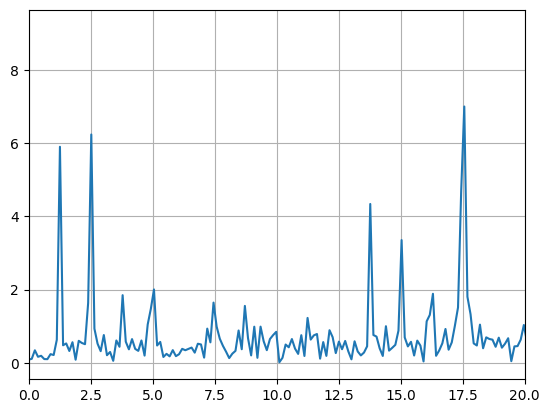

In [24]:
T = 1 / 250
L=len(cannal_0_fA1f)
xf1 = np.linspace(0.0, 1.0/(2.0*T), L//2)

plt.plot(xf1, 2.0/L * np.abs(transformada[0:L//2])),plt.grid()
plt.xlim(0,20)

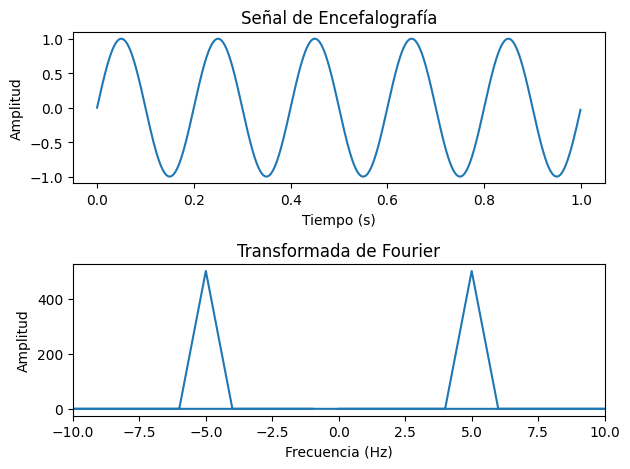

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros de la señal
frecuencia = 5  # Frecuencia de la señal en Hz
tiempo_total = 1  # Duración total de la señal en segundos
muestras_por_segundo = 1000  # Número de muestras por segundo

# Crear el vector de tiempo
t = np.linspace(0, tiempo_total, int(tiempo_total * muestras_por_segundo), endpoint=False)

# Crear la señal de encefalografía
senal = np.sin(2 * np.pi * frecuencia * t)

# Calcular la transformada de Fourier
transformada = np.fft.fft(senal)

# Calcular las frecuencias correspondientes a los coeficientes de la transformada
frecuencias = np.fft.fftfreq(len(transformada), d=1/muestras_por_segundo)

# Graficar la señal original
plt.subplot(2, 1, 1)
plt.plot(t, senal)
plt.title('Señal de Encefalografía')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

# Graficar la transformada de Fourier
plt.subplot(2, 1, 2)
plt.plot(frecuencias, np.abs(transformada))
plt.title('Transformada de Fourier')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(-10,10)

# Mostrar la figura con las dos subgráficas
plt.tight_layout()
plt.show()


In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import save_model, load_model
import numpy as np

# Paso 1: Crear y entrenar la red neuronal
# Supongamos que tenemos datos de entrada X y datos de salida y para entrenar la red neuronal
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

modelo = Sequential()
modelo.add(Dense(4, input_dim=2, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(X, y, epochs=500, batch_size=2)

# Paso 2: Guardar el modelo
modelo.save('modelo.h5')

# Paso 3: Cargar el modelo y usarlo
modelo_cargado = load_model('modelo.h5')

# Ejemplo de uso del modelo cargado
entrada = np.array([[0, 1]])
resultado = modelo_cargado.predict(entrada)
print(resultado)  # Imprimir el resultado obtenido


Epoch 1/500
2/2 [==============================] - 2s 19ms/step - loss: 0.7271 - accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 0.7264 - accuracy: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7261 - accuracy: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 13ms/step - loss: 0.7257 - accuracy: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 22ms/step - loss: 0.7250 - accuracy: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.7246 - accuracy: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 0.7241 - accuracy: 0.5000
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 0.7237 - accuracy: 0.2500
Epoch 9/500
2/2 [==============================] - 0s 13ms/step - loss: 0.7233 - accuracy: 0.2500
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 0.7231 - accuracy: 0.2500
Epoch 11/500
2/2 [=

In [56]:
modelo_cargado = load_model('modelo.h5')

In [71]:
entrada = np.array([[0, 1]])
resultado = modelo_cargado.predict(entrada)
print(resultado) 

1/1 [==============================] - 0s 52ms/step
[[0.50052404]]
